### Importing Libraries

In [42]:
#For data manipulation
import pandas as pd
import numpy as np

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

#For text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
import collections
import re
#import emoji
#from emot.emo_unicode import UNICODE_EMOJI
from wordcloud import WordCloud

#For Sentimental Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
pip install emot

In [44]:
pip install emoji

#### Reading the data retrieved using the keyword 'vaccine'

In [45]:
data=pd.read_csv("output_vaccine.csv",lineterminator='\n')

In [46]:
data.shape

(30956, 5)

In [47]:
data.head()

,Unnamed: 0,text,favorite_count,retweet_count,created_at
0,0,RT @Gtv_Luna: 🙏Pray for the victims💔\n☣️Stop t...,0,7,2021-10-23 23:59:46+00:00
1,1,RT @SonjaSorensen2: #vaccine a Belgian GP has ...,0,2161,2021-10-23 23:59:09+00:00
2,2,This guy’s take on the ongoing shortages cause...,0,0,2021-10-23 23:58:43+00:00
3,3,RT @ranjithramamd: Andrology fellow @kevinchum...,0,8,2021-10-23 23:58:31+00:00
4,4,RT @CityNewsVAN: First Nations leaders in B.C....,0,5,2021-10-23 23:58:28+00:00


In [48]:
data.columns

Index(['Unnamed: 0', 'text', 'favorite_count', 'retweet_count', 'created_at'], dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30956 entries, 0 to 30955
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30956 non-null  int64 
 1   text            30956 non-null  object
 2   favorite_count  30956 non-null  int64 
 3   retweet_count   30956 non-null  int64 
 4   created_at      30956 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


#### Looking for null values

In [50]:
data.isna().sum()

Unnamed: 0        0
text              0
favorite_count    0
retweet_count     0
created_at        0
dtype: int64

In [51]:
data["favorite_count"].value_counts()

0      25764
1       2084
2        906
3        484
4        301
       ...  
327        1
375        1
391        1
72         1
87         1
Name: favorite_count, Length: 149, dtype: int64

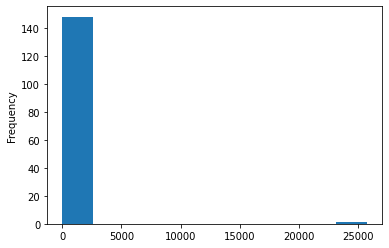

In [52]:
data["favorite_count"].value_counts().plot(kind='hist')

In [53]:
data["retweet_count"].value_counts()

0       9181
1       3196
2       1775
3       1266
2165     994
        ... 
1974       1
625        1
284        1
103        1
903        1
Name: retweet_count, Length: 169, dtype: int64

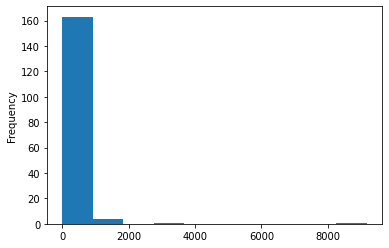

In [54]:
data["retweet_count"].value_counts().plot(kind='hist')

#### Sorting the data according to the retweet_count

In [55]:
data1=data.sort_values(by="retweet_count",ascending=False)
data1

,Unnamed: 0,text,favorite_count,retweet_count,created_at
8840,8840,RT @HiteshVasnani: Pfizer is not the 'Apple' b...,0,29156,2021-10-22 01:13:59+00:00
29369,29369,"RT @RahulGandhi: India needs #vaccine, Mr. Lyi...",0,16542,2021-10-17 11:50:53+00:00
29376,29376,"RT @RahulGandhi: India needs #vaccine, Mr. Lyi...",0,16542,2021-10-17 11:49:47+00:00
17589,17589,"RT @RahulGandhi: India needs #vaccine, Mr. Lyi...",0,16536,2021-10-20 04:46:06+00:00
29372,29372,RT @RahulGandhi: “First they ignore you\nthen ...,0,13322,2021-10-17 11:50:36+00:00
...,...,...,...,...,...
17119,17119,#Sportivation\n\n68% of Premier League players...,1,0,2021-10-20 07:40:32+00:00
17117,17117,#India has delayed committing supplies of #vac...,1,0,2021-10-20 07:42:09+00:00
21151,21151,@Drop_Your_NFT My new collection\nPlease help ...,3,0,2021-10-19 11:56:36+00:00
24767,24767,Let’s keep in mind that Former Secretary of St...,0,0,2021-10-18 15:36:34+00:00


In [56]:
data1['text'][0]

'RT @Gtv_Luna: 🙏Pray for the victims💔\n☣️Stop the #COVID19 💉 #vaccines ‼️\n#Vaccine #Vaccination #MandatoryVaccination #VaccinePassport https:…'

In [57]:
#Storing the tweets alone into a dataframe
# df= data1["text"]

In [58]:
# df[0]

#### Plotting the top ten stop words

In [59]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= data1['text'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

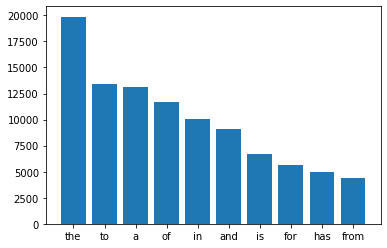

In [60]:
plot_top_stopwords_barchart(data1['text'])

#### Plotting the top non-stop words

In [61]:
import collections

In [62]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= data1['text'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=collections.Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

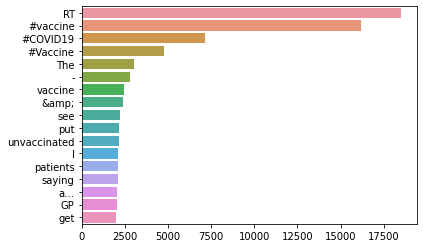

In [63]:
plot_top_non_stopwords_barchart(data1['text'])

### Preprocessing

#### Convert every text to lower case

In [64]:
data1['text']=data1['text'].str.lower()
data1['text'][2]

'this guy’s take on the ongoing shortages caused by supply chain disruptions in the us. *sigh*\n#america #trump #covid #vaccine #vaccination https://t.co/nctqdfbkcb'

In [65]:
data1['text'][0]

'rt @gtv_luna: 🙏pray for the victims💔\n☣️stop the #covid19 💉 #vaccines ‼️\n#vaccine #vaccination #mandatoryvaccination #vaccinepassport https:…'

#### Convert emojis into meaningful words

In [66]:
import emoji
from emot.emo_unicode import UNICODE_EMOJI # Converting emojis to words
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

data1['text'] = data1['text'].apply(convert_emojis)

In [67]:
data1['text'][0]

'rt @gtv_luna: folded_handspray for the victimsbroken_heart\nbiohazard️stop the #covid19 syringe #vaccines double_exclamation_mark️\n#vaccine #vaccination #mandatoryvaccination #vaccinepassport https:…'

#### Remove urls

In [68]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
data1['text']=data1['text'].apply(remove_urls)

In [69]:
data1['text'][2]

'this guy’s take on the ongoing shortages caused by supply chain disruptions in the us. *sigh*\n#america #trump #covid #vaccine #vaccination '

In [70]:
data1['text'][0]

'rt @gtv_luna: folded_handspray for the victimsbroken_heart\nbiohazard️stop the #covid19 syringe #vaccines double_exclamation_mark️\n#vaccine #vaccination #mandatoryvaccination #vaccinepassport https:…'

In [71]:
#to remove urls that was not removed before
def remove_urls(text):
    url_pattern = re.compile(r'https')
    return url_pattern.sub(r'', text)
data1['text']=data1['text'].apply(remove_urls)

In [72]:
data1['text'][0]

'rt @gtv_luna: folded_handspray for the victimsbroken_heart\nbiohazard️stop the #covid19 syringe #vaccines double_exclamation_mark️\n#vaccine #vaccination #mandatoryvaccination #vaccinepassport :…'

#### Remove special characters

In [73]:
data1['text']=data1['text'].str.replace('[^\w\s]','')
data1['text'][2]

'this guys take on the ongoing shortages caused by supply chain disruptions in the us sigh\namerica trump covid vaccine vaccination '

In [74]:
data1['text'][0]

'rt gtv_luna folded_handspray for the victimsbroken_heart\nbiohazardstop the covid19 syringe vaccines double_exclamation_mark\nvaccine vaccination mandatoryvaccination vaccinepassport '

#### Remove stopwords

In [75]:
stop=stopwords.words('english')
data1['text'] = data1['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data1['text'][2]

'guys take ongoing shortages caused supply chain disruptions us sigh america trump covid vaccine vaccination'

#### Remove numbers

In [76]:
def remove_num(text):
    rem_num = re.compile(r'[0-9]+')
    return rem_num.sub(r'', text)
data1['text']=data1['text'].apply(remove_num)

In [77]:
data1['text'][17119]

'sportivation  premier league players fully vaccinated premierleague vaccine endsars endsarsmemorial'

In [78]:
data1['text'][0]

'rt gtv_luna folded_handspray victimsbroken_heart biohazardstop covid syringe vaccines double_exclamation_mark vaccine vaccination mandatoryvaccination vaccinepassport'

#### Lemmatization

In [38]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data1['text'] = data1['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [39]:
data1['text'][17119]

'sportivation premier league player fully vaccinated premierleague vaccine endsars endsarsmemorial'

In [40]:
data1['text'][0]

'rt gtv_luna folded_handspray victimsbroken_heart biohazardstop covid syringe vaccine double_exclamation_mark vaccine vaccination mandatoryvaccination vaccinepassport'

#### Tokenization

In [80]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
data1['tokenized'] = data1['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [81]:
data1.head()

,Unnamed: 0,text,favorite_count,retweet_count,created_at,tokenized
8840,8840,rt hiteshvasnani pfizer apple brand vaccines b...,0,29156,2021-10-22 01:13:59+00:00,"[rt, hiteshvasnani, pfizer, apple, brand, vacc..."
29369,29369,rt rahulgandhi india needs vaccine mr lying ma...,0,16542,2021-10-17 11:50:53+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l..."
29376,29376,rt rahulgandhi india needs vaccine mr lying ma...,0,16542,2021-10-17 11:49:47+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l..."
17589,17589,rt rahulgandhi india needs vaccine mr lying ma...,0,16536,2021-10-20 04:46:06+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l..."
29372,29372,rt rahulgandhi first ignore laugh fight win va...,0,13322,2021-10-17 11:50:36+00:00,"[rt, rahulgandhi, first, ignore, laugh, fight,..."


#### Word Cloud

In [82]:
from wordcloud import WordCloud

(-0.5, 1599.5, 799.5, -0.5)

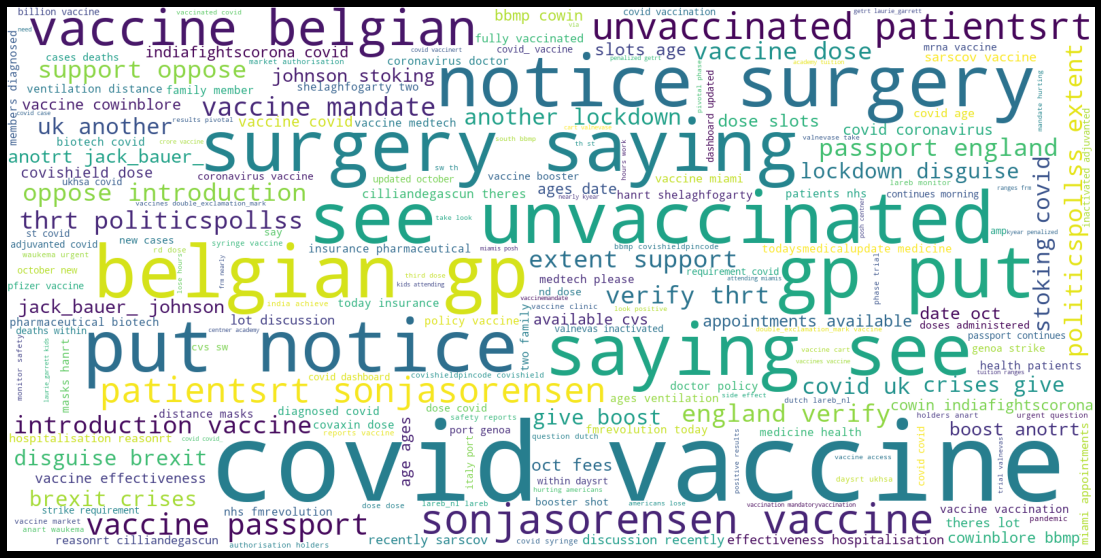

In [83]:
wordcloud = WordCloud(background_color="white",width=1600,height=800).generate(''.join(data1['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

### Sentimental Analysis

In [84]:
pip install textblob

In [85]:
from textblob import TextBlob

#### Calculate polarity and subjectivity

In [86]:
data1[['polarity', 'subjectivity']] = data1['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [87]:
data1.head()

,Unnamed: 0,text,favorite_count,retweet_count,created_at,tokenized,polarity,subjectivity
8840,8840,rt hiteshvasnani pfizer apple brand vaccines b...,0,29156,2021-10-22 01:13:59+00:00,"[rt, hiteshvasnani, pfizer, apple, brand, vacc...",0.70,0.350000
29369,29369,rt rahulgandhi india needs vaccine mr lying ma...,0,16542,2021-10-17 11:50:53+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l...",0.00,0.000000
29376,29376,rt rahulgandhi india needs vaccine mr lying ma...,0,16542,2021-10-17 11:49:47+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l...",0.00,0.000000
17589,17589,rt rahulgandhi india needs vaccine mr lying ma...,0,16536,2021-10-20 04:46:06+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l...",0.00,0.000000
29372,29372,rt rahulgandhi first ignore laugh fight win va...,0,13322,2021-10-17 11:50:36+00:00,"[rt, rahulgandhi, first, ignore, laugh, fight,...",0.45,0.277778


In [88]:
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [90]:
for index, row in data1['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        data1.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        data1.loc[index, 'sentiment'] = "positive"
    else:
        data1.loc[index, 'sentiment'] = "neutral"
        data1.loc[index, 'neg'] = neg
        data1.loc[index, 'neu'] = neu
        data1.loc[index, 'pos'] = pos
        data1.loc[index, 'compound'] = comp


In [91]:
data1

,Unnamed: 0,text,favorite_count,retweet_count,created_at,tokenized,polarity,subjectivity,sentiment,neg,neu,pos,compound
8840,8840,rt hiteshvasnani pfizer apple brand vaccines b...,0,29156,2021-10-22 01:13:59+00:00,"[rt, hiteshvasnani, pfizer, apple, brand, vacc...",0.700000,0.350000,positive,NaN,NaN,NaN,NaN
29369,29369,rt rahulgandhi india needs vaccine mr lying ma...,0,16542,2021-10-17 11:50:53+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l...",0.000000,0.000000,negative,NaN,NaN,NaN,NaN
29376,29376,rt rahulgandhi india needs vaccine mr lying ma...,0,16542,2021-10-17 11:49:47+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l...",0.000000,0.000000,negative,NaN,NaN,NaN,NaN
17589,17589,rt rahulgandhi india needs vaccine mr lying ma...,0,16536,2021-10-20 04:46:06+00:00,"[rt, rahulgandhi, india, needs, vaccine, mr, l...",0.000000,0.000000,negative,NaN,NaN,NaN,NaN
29372,29372,rt rahulgandhi first ignore laugh fight win va...,0,13322,2021-10-17 11:50:36+00:00,"[rt, rahulgandhi, first, ignore, laugh, fight,...",0.450000,0.277778,positive,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,17119,sportivation premier league players fully vac...,1,0,2021-10-20 07:40:32+00:00,"[sportivation, premier, league, players, fully...",0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
17117,17117,india delayed committing supplies vaccine cova...,1,0,2021-10-20 07:42:09+00:00,"[india, delayed, committing, supplies, vaccine...",0.033333,0.433333,positive,NaN,NaN,NaN,NaN
21151,21151,drop_your_nft new collection please help promo...,3,0,2021-10-19 11:56:36+00:00,"[drop_your_nft, new, collection, please, help,...",0.318182,0.477273,positive,NaN,NaN,NaN,NaN
24767,24767,lets keep mind former secretary state colinpow...,0,0,2021-10-18 15:36:34+00:00,"[lets, keep, mind, former, secretary, state, c...",0.000000,0.000000,negative,NaN,NaN,NaN,NaN


In [92]:
#Creating new data frames for all sentiments (positive, negative and neutral)
data1_negative = data1[data1["sentiment"]== "negative"]
data1_positive = data1[data1["sentiment"]== "positive"]
data1_neutral = data1[data1["sentiment"]== "neutral"]

In [93]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(data1,"sentiment")


,Total,Percentage
positive,11957,38.63
neutral,11823,38.19
negative,7176,23.18


### Visualizing the sentiments

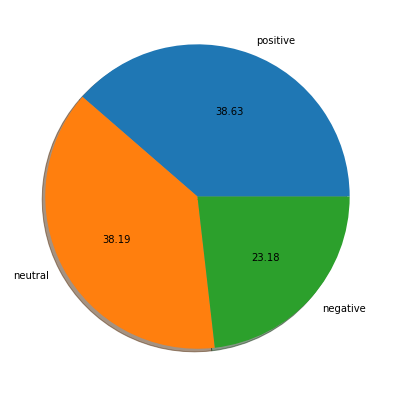

In [94]:
# create data for Pie Chart
pichart = count_values_in_column(data1,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot


fig = plt.figure(figsize =(10, 7))
plt.pie(size, labels = names, shadow = True, autopct='%.2f')
plt.show()

### Word cloud for positive sentiments

(-0.5, 1599.5, 799.5, -0.5)

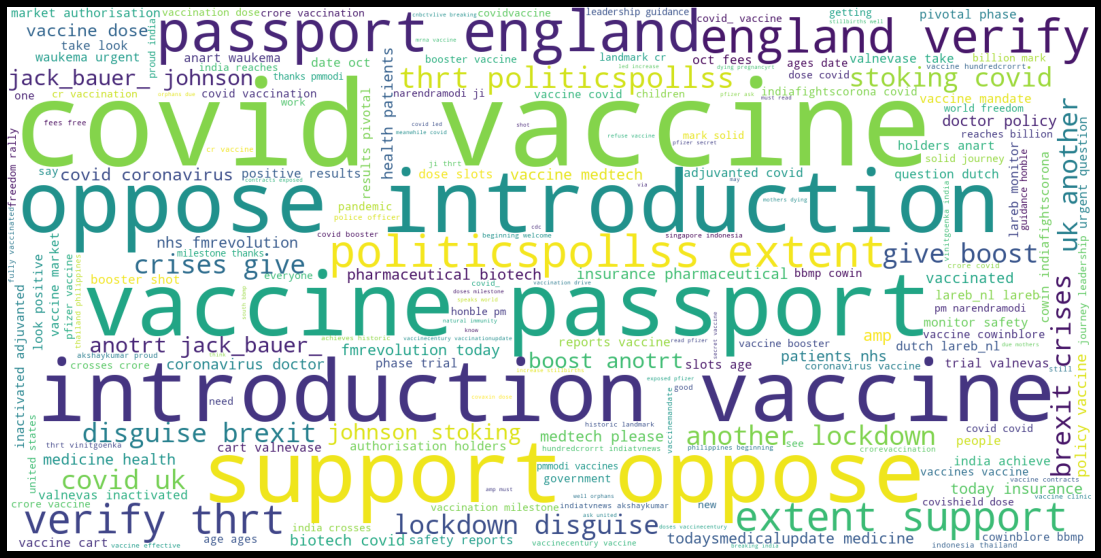

In [95]:
wordcloud = WordCloud(background_color="white",width=1600,height=800).generate(''.join(data1_positive['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

### Word cloud for negative sentiments

(-0.5, 1599.5, 799.5, -0.5)

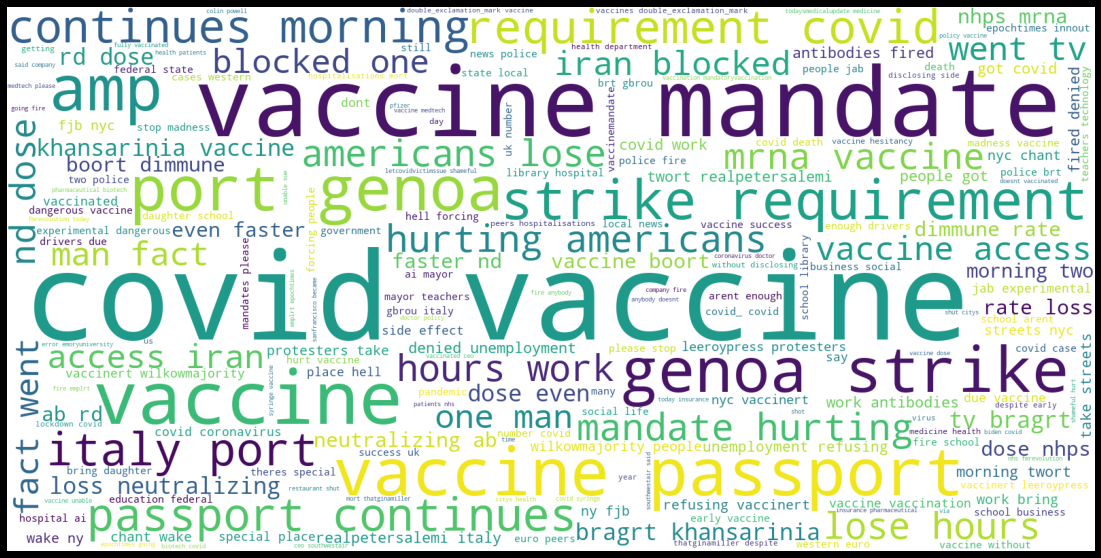

In [96]:
wordcloud = WordCloud(background_color="white",width=1600,height=800).generate(''.join(data1_negative['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

### Word cloud for neutral sentiments

(-0.5, 1599.5, 799.5, -0.5)

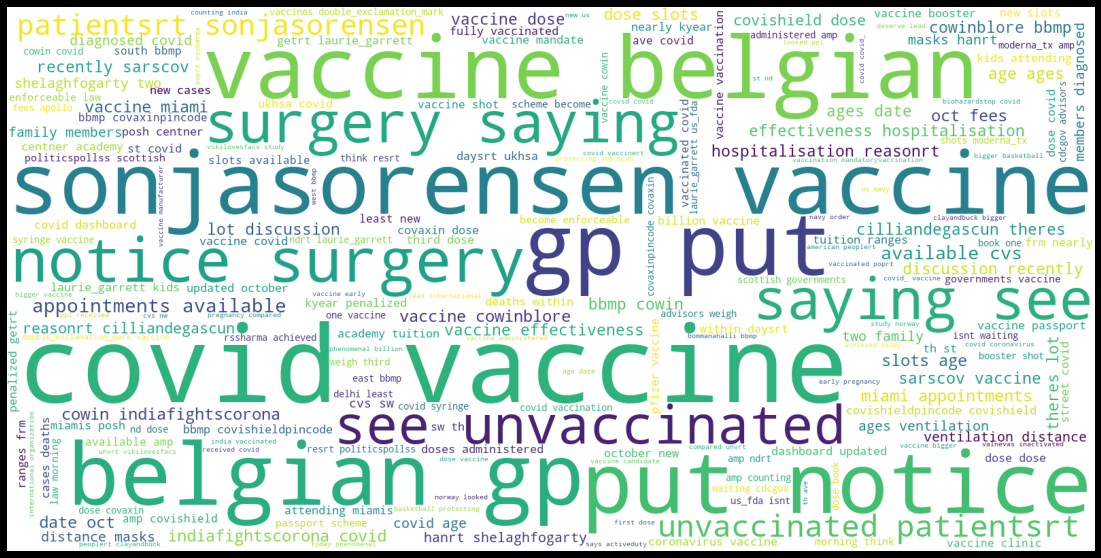

In [97]:
wordcloud = WordCloud(background_color="white",width=1600,height=800).generate(''.join(data1_neutral['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

In [98]:
#Calculating tweet’s length and word count
data1['text_len'] = data1['text'].astype(str).apply(len)
data1['text_word_count'] = data1['text'].apply(lambda x: len(str(x).split()))

#### Tweet length analysis

In [99]:
text_length = round(pd.DataFrame(data1.groupby("sentiment").text_len.mean()),2)

In [100]:
text_length

,text_len
sentiment,
negative,123.82
neutral,103.66
positive,124.32


In [101]:
text_length = {'sentiment':['neutral', 'negative', 'positive'], 'Average_text_length' :[100.88, 117.83,124.39]}

In [102]:
text_length = pd.DataFrame.from_dict(text_length)

In [103]:
text_length

,sentiment,Average_text_length
0,neutral,100.88
1,negative,117.83
2,positive,124.39


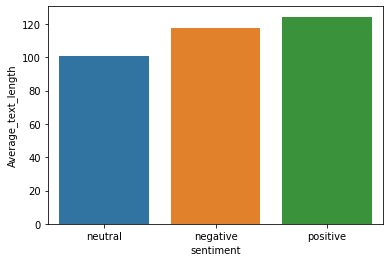

In [104]:
sns.barplot(x = "sentiment", y = "Average_text_length", data = text_length)

#### Tweet word count analysis

In [105]:
word_count = round(pd.DataFrame(data1.groupby('sentiment').text_word_count.mean()),2)

In [106]:
word_count

,text_word_count
sentiment,
negative,16.18
neutral,13.21
positive,15.99


In [107]:
word_count = {'sentiment':['neutral', 'negative', 'positive'], 'Average_word_count' :[13.18, 15.83,16.16]}

In [108]:
word_count = pd.DataFrame.from_dict(word_count)

In [109]:
word_count

,sentiment,Average_word_count
0,neutral,13.18
1,negative,15.83
2,positive,16.16


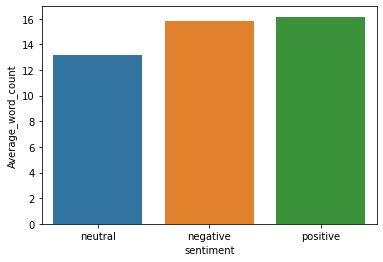

In [110]:
sns.barplot(x = "sentiment", y = "Average_word_count", data = word_count)

**TIME** **SERIES** **ANALYSIS**

In [120]:
data = [data1["created_at"], data1["sentiment"]]

headers = ["created_at", "sentiment"]

df3 = pd.concat(data, axis=1, keys=headers)
df3